In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

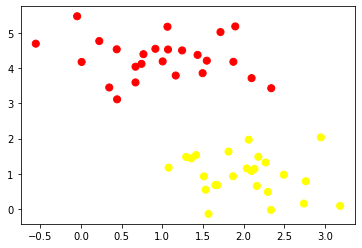

In [2]:
from sklearn.datasets import make_blobs

# membuat dataset dengan parameter
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# melakukan visualisasi dataset yang dibuat dengan scatter
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

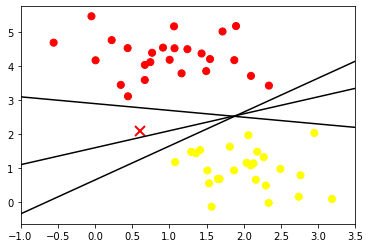

In [3]:
# membuat array Numpy xfit berisikan jumlah niai dari -1 sampai 3.5 yang digunakan sebagai garis pemisah
xfit = np.linspace(-1, 3.5)

# melakukan visualisasi data dalam bentuk scatter 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

#menambahkan tanda x berwarna merah sebagai sorot pada titik tertentu
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

# mengterasi melalui beberapa pasangan
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    
    # menggambarkan garis lurus dalam plot
    plt.plot(xfit, m * xfit + b, '-k')

# mengatur batasan sumbu x 
plt.xlim(-1, 3.5)

(-1.0, 3.5)

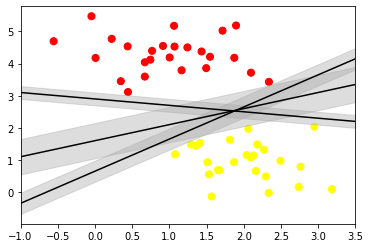

In [4]:
# membuat array Numpy xfit berisikan jumlah niai dari -1 sampai 3.5 yang digunakan sebagai garis pemisah
xfit = np.linspace(-1, 3.5)

# menggambar garis pemisah xfit sebagai koordinat x dan yfit sebagai koordinat y
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# menggambarkan area bayangan (ketidakpastian)
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
    
# mengatur batasan sumbu x 
plt.xlim(-1, 3.5)

In [5]:
# import svc
from sklearn.svm import SVC # "Support vector classifier"

# membuat objek model
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

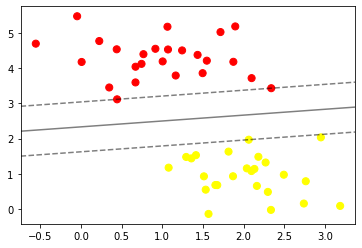

In [7]:
# melakukan visualisasi hasil pemisahan kelas 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [8]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

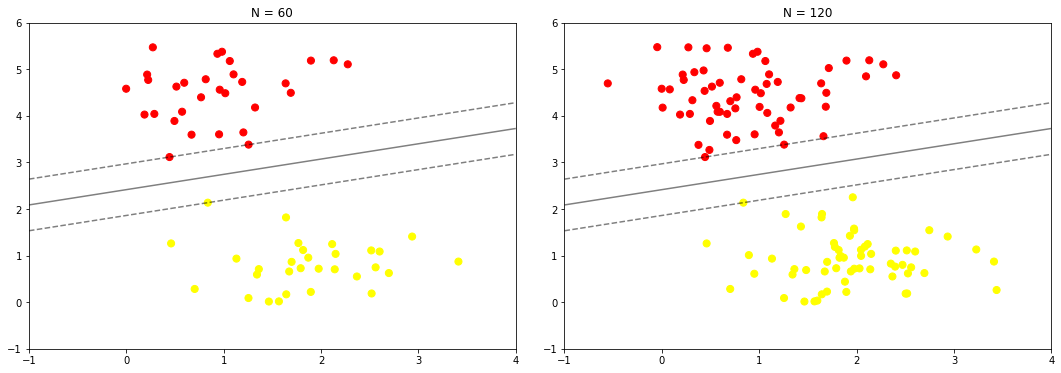

In [9]:
# membuat subplot dengan pemisahan kelas
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    # mengatur batasan sumbu x dan y
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)

    # memanggil fungsi 'plot_svc_decision_function'
    plot_svc_decision_function(model, ax)

# mengatur harak antar subplot secara horizontal
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

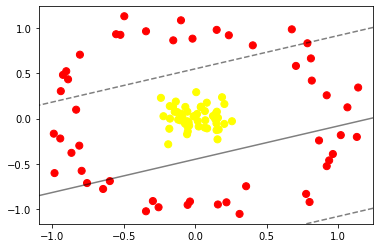

In [18]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles

# membuat datasest sintetis
X, y = make_circles(100, factor=.1, noise=.1)

# memisahkan 2 kelas dalam dataset
clf = SVC(kernel='linear').fit(X, y)

# melakukan visualisasi dataset dengan scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [19]:
# menghitung nilai eksponensial
r = np.exp(-(X ** 2).sum(1))

In [20]:
from mpl_toolkits import mplot3d

# membuat plot 3D dari dataset
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

# membuat interaksi dengan plot 3D
interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 3.95263113e-02,  1.26023398e-01],
       [ 8.16943698e-01,  4.19378452e-01],
       [ 9.38382682e-01, -4.61805568e-01],
       [-1.35051445e-01,  1.87747393e-01],
       [-2.95533397e-01, -9.10808388e-01],
       [-1.75904461e-01, -6.54894476e-04],
       [ 6.84109132e-02,  8.25838646e-02],
       [-1.80927780e-02,  8.82246335e-01],
       [-8.06192661e-01,  7.05240813e-01],
       [-5.51467310e-02, -2.97415867e-02],
       [-5.61140857e-02, -1.73340014e-01],
       [-9.24925841e-01,  4.82257613e-01],
       [-9.88374936e-02,  1.08482831e+00],
       [-1.54372560e-01,  1.31530456e-01],
       [ 8.39003794e-02, -1.08558080e-01],
       [ 2.05109578e-01,  1.60620329e-01],
       [ 2.57939247e-01, -2.95083537e-02],
       [ 1.13218663e+00, -2.02797122e-01],
       [-4.95598214e-01,  1.12962998e+00],
       [ 6.76970675e-01,  9.85113614e-01],
       [ 6.73191174e-02, -9.96981855e-02],
       [-6.83419538e-02,  1.28479428e-01],
       

In [22]:
# membuat prediksi pada data
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

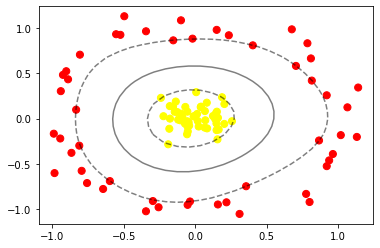

In [23]:
# visualisasi dataset dengan garis pemisah SVM yang dihasilkan oleh kernel RBF
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

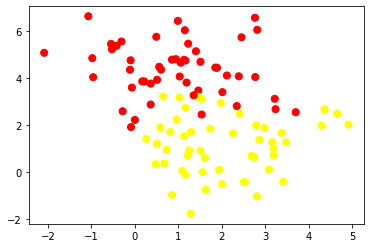

In [24]:
# isualisasi dari dataset sintetis dengan dua kelompok data yang dapat dipisahkan dengan jelas oleh garis pemisah linear
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

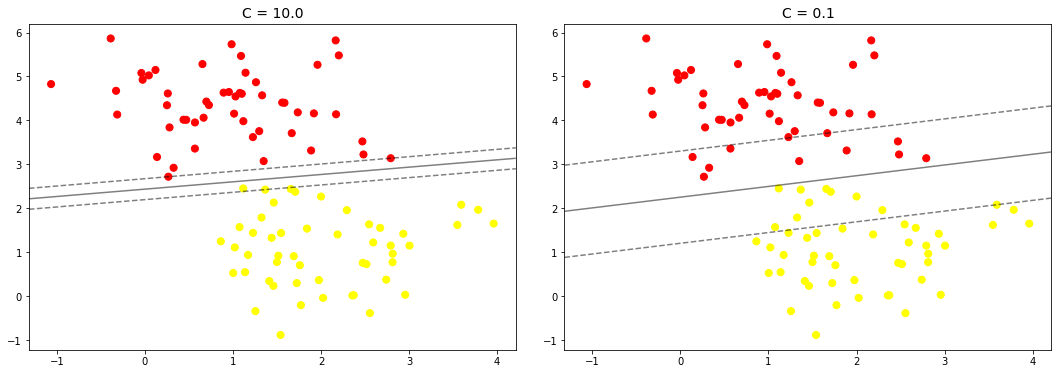

In [25]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

# membuat subplot secara horizontal
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# melakukan pemisahan kelas dalam dataset yang sama
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)